In [21]:
import pandas as pd
import pyodbc
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import math
import matplotlib.pyplot as plt
import warnings
import numpy as np
import warnings
warnings.simplefilter('ignore')

source_db = {
    'servername': r'LAPTOP-NDOACQTH\SQLEXPRESS',
    'database': 'DWUnitedOutdoors'
}

source_conn_str = (
    'Driver={SQL Server};'
    'SERVER=' + source_db['servername'] + ';'
    'DATABASE=' + source_db['database'] + ';'
    'Trusted_Connection=yes;'
)
try:
    with pyodbc.connect(source_conn_str) as source_conn:
        product_df = pd.read_sql_query("SELECT ProductID, ListPrice, StandardCost  FROM dbo.ProductionProduct", source_conn)
        sales_order_df = pd.read_sql_query("SELECT * FROM dbo.Sales_Order", source_conn)
        sales_df = pd.merge(sales_order_df, product_df, on='ProductID', how='left')
except pyodbc.Error as e:
    print("Error while connecting to the source SQL Server:", e)

sales_df.dtypes

SalesOrderID                      int64
OrderDate                datetime64[ns]
DueDate                  datetime64[ns]
ShipDate                 datetime64[ns]
Status                            int64
SalesOrderNumber                 object
PurchaseOrderNumber              object
AccountNumber                    object
CustomerID                        int64
SalesPersonID                     int64
TerritoryID                       int64
BillToAdressID                    int64
ShipToAdressID                    int64
ShipMethodID                      int64
SubTotal                        float64
TaxAmt                          float64
Freight                         float64
CreditcardID                      int64
SalesOrderDetailID                int64
Carriertrackingnumber            object
OrderQty                          int64
ProductID                         int64
UnitPrice                       float64
UnitPriceDiscount               float64
LineTotal                       float64


In [22]:
df = sales_df.loc[:, ["OrderQty", "UnitPrice"]]
df

,OrderQty,UnitPrice
0,2,183.9382
1,2,28.8404
2,2,419.4589
3,1,2039.9940
4,4,419.4589
...,...,...
121312,1,2319.9900
121313,1,54.9900
121314,1,2319.9900
121315,1,34.9900


In [23]:
scaler = StandardScaler()
sales_scaled = scaler.fit_transform(df)

In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
sales_df['Cluster'] = kmeans.fit_predict(sales_scaled)

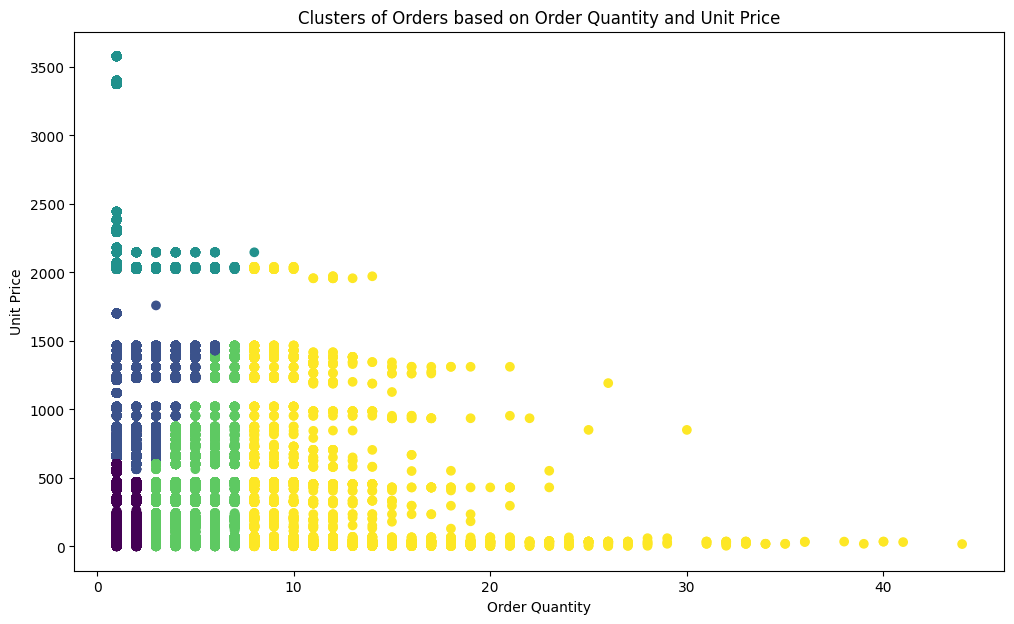

In [25]:
plt.figure(figsize=(12, 7))
plt.scatter(sales_df['OrderQty'], sales_df['UnitPrice'], c=sales_df['Cluster'], cmap='viridis')
plt.xlabel('Order Quantity')
plt.ylabel('Unit Price')
plt.title('Clusters of Orders based on Order Quantity and Unit Price')
plt.show()